In [3]:
import pandas as pd

# Step 1: Read the CSV file
df = pd.read_csv("Walmart.csv")

# Step 2: Save it as an Excel (.xlsx) file
df.to_excel("Walmart.xlsx", index=False)

print("CSV has been converted to Excel successfully.")


CSV has been converted to Excel successfully.


In [4]:
import pandas as pd

# Step 1: Read the CSV file
df = pd.read_csv("Walmart.csv")

# Step 2: Save it as an Excel (.xlsx) file
df.to_excel("Walmart.xlsx", index=False)

In [5]:
import pandas as pd

df = pd.read_excel("Walmart.xlsx", engine='openpyxl')
df.head()  # Show first 5 rows


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


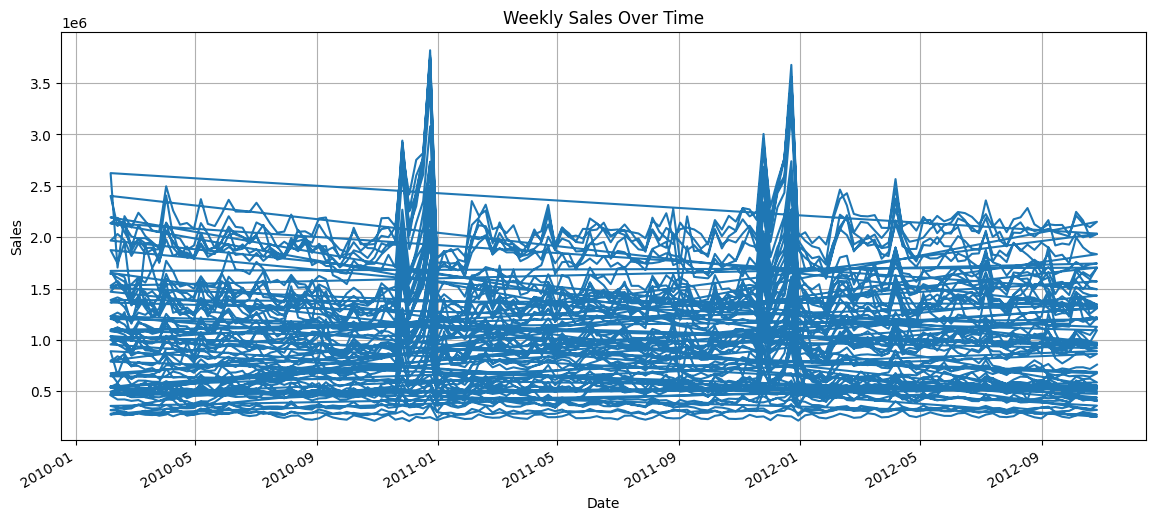

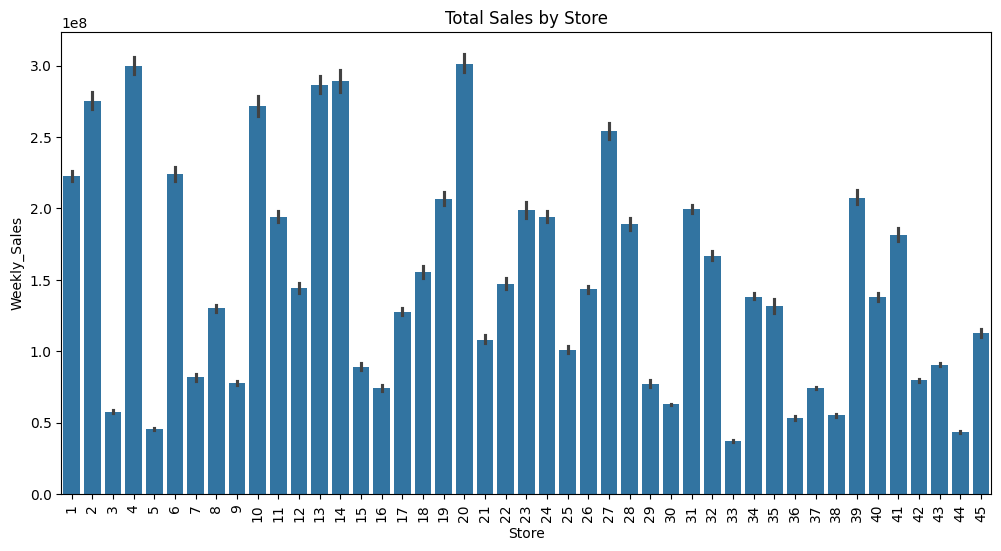

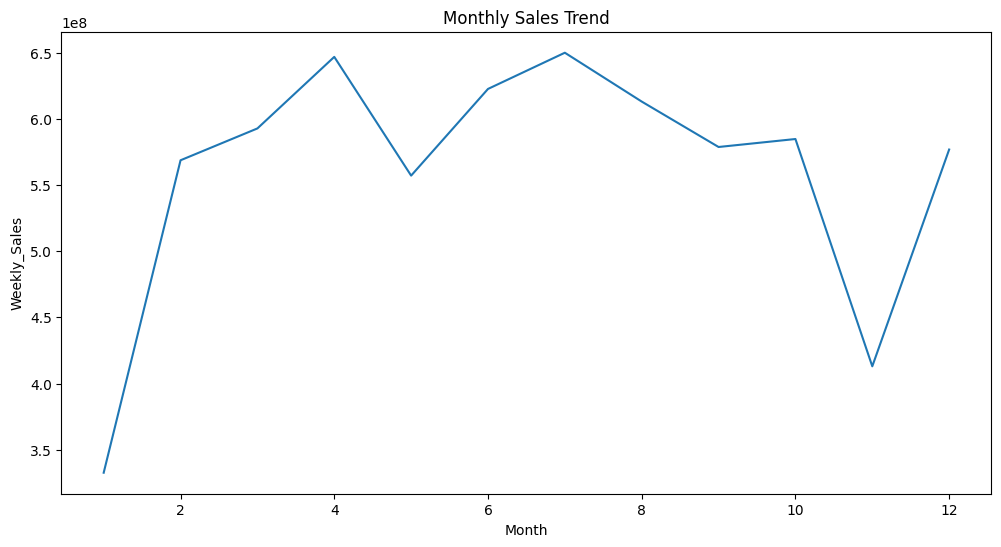

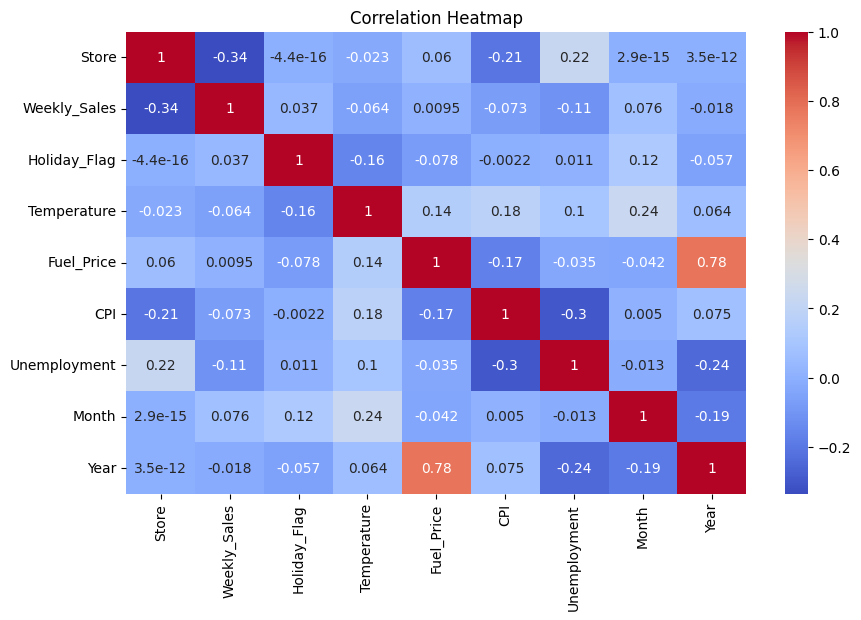

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_excel("walmart.xlsx", engine='openpyxl')

print(df.info())
df.head()
# Check for missing values
print(df.isnull().sum())
# Drop duplicates if any
df.drop_duplicates(inplace=True)
# Convert date column (assuming it's named 'Date') to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# Set Date as index for time-series analysis
df.set_index('Date', inplace=True)
# Plot sales over time
plt.figure(figsize=(14,6))
df['Weekly_Sales'].plot()
plt.title("Weekly Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid(True)
plt.show()
# Sales by store
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Store', y='Weekly_Sales', estimator=sum)
plt.title("Total Sales by Store")
plt.xticks(rotation=90)
plt.show()
# Sales by department if available
if 'Dept' in df.columns:
    plt.figure(figsize=(12,6))
    sns.barplot(data=df, x='Dept', y='Weekly_Sales', estimator=sum)
    plt.title("Total Sales by Department")
    plt.xticks(rotation=90)
    plt.show()


# Extract time features
df['Month'] = df.index.month
df['Year'] = df.index.year
     

# Monthly trend
plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby('Month')['Weekly_Sales'].sum())
plt.title("Monthly Sales Trend")
plt.show()
     
# Check holiday impact
if 'IsHoliday' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
    plt.title("Impact of Holidays on Weekly Sales")
    plt.show()
 

# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
     
        